Bangalore   635


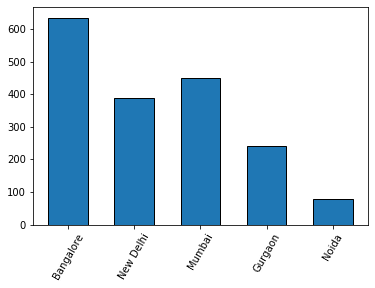

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def correct_city(s):
    l=s.split('/')
    city=l[0].strip()
    if city=='Delhi':
        return 'New Delhi'
    if city=='bangalore':
        return 'Bangalore'
    return city

df=pd.read_csv('D:\startup_funding.csv')
df.CityLocation.dropna(inplace=True)

df['city']=df.CityLocation.apply(correct_city)
city_count=df.city.value_counts()
#print(city_count)

cities=['Bangalore','New Delhi','Mumbai','Gurgaon','Noida']
num_fundings=[city_count.loc[city] for city in cities]
print(cities[0],' ',num_fundings[0])

plt.bar(cities,num_fundings,width=0.6,edgecolor='black')
plt.xticks(rotation=60)
plt.show()


Sequoia Capital
Accel Partners
Kalaari Capital
SAIF Partners
Indian Angel Network


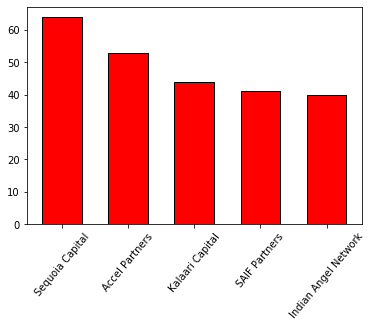

In [3]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
investor_count = {}
with open("D:\startup_funding.csv",encoding='utf8') as obj:
    file_data =csv.DictReader(obj, skipinitialspace = True)
    for row in file_data:
        investors = row["InvestorsName"]
        if not pd.isnull(investors) and investors != '':
            invest_list = [investr.strip() for investr in investors.split(',')]
            for i in invest_list:
                investor_count[i] = investor_count.get(i,0)+1
investor_count_arr = list(investor_count.items())
investor_count_arr.sort(key=lambda x:x[1])
required_arr = investor_count_arr[::-1]
    
arr = [required_arr[i][1] for i in range(5)]
investors = [required_arr[i][0] for i in range(5)]
for i in investors:
    print(i)

plt.bar(investors, arr, color = 'red', width = 0.6, edgecolor='black')
plt.xticks(rotation = 50)
plt.show()


Sequoia Capital
Indian Angel Network
Kalaari Capital
Accel Partners
Blume Ventures


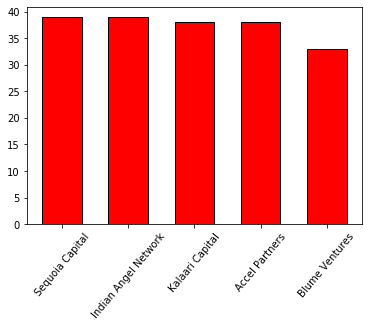

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
with open("D:\startup_funding.csv", encoding="utf8") as file:
    fileData = pd.read_csv(file) #Reading File 
    
    fileData.StartupName.replace('Flipkart.com','Flipkart',inplace = True)
    fileData.StartupName.replace('Ola Cabs','Ola',inplace = True)
    fileData.StartupName.replace('Olacabs','Ola',inplace = True)
    fileData.StartupName.replace('Paytm Marketplace','Paytm',inplace=True)
    fileData.StartupName.replace('Oyo Rooms','Oyo',inplace=True)
    fileData.StartupName.replace('Oyorooms','Oyo',inplace=True)
    fileData.StartupName.replace('OyoRooms','Oyo',inplace=True)
    fileData.StartupName.replace('OYO Rooms','Oyo',inplace=True)
    fileData.InvestorsName.fillna("Unknown", inplace = True)
    def createDict(inv, start):
        d = {}
        for i in range(len(fileData.StartupName)):
            if(start[i] not in d):
                d[start[i]] = set()
                if("," not in inv[i]):
                    d[start[i]].add(inv[i].strip())
                else:
                    string = inv[i].strip().split(",")
                    for j in string:
                        d[start[i]].add(j.strip())
            else:
                d[start[i]].add(inv[i])
        return d
    dictionary = createDict(fileData["InvestorsName"],fileData["StartupName"])
    
    li = set() #Unique name list
    names = fileData.InvestorsName.unique()
    for i in names:
        if("," not in i):
            li.add(i.strip()) #Adding to set li, when single name is given
        else:
            s = i.strip().split(",") #Removing spaces(extra) and splitting on the basis of comma
            for j in s:
                li.add(j.strip())

    e = {} #dictionary for values            
    count = 0
    for i in li:
        for j in dictionary:
            if(i in dictionary[j]):
                count += 1
        e[i] = count
        count = 0
    e["Undisclosed Investors"] = -1
    e[""] = -1
    e["Undisclosed investors"] = -1
    e = {k: v for k, v in sorted(e.items(), key=lambda item: item[1], reverse = True)}
    
    k=Counter(e)
    high=k.most_common(5)
    for i in high:
        print(i[0])

investors = [high[i][0] for i in range(5)]   
investments = [high[i][1] for i in range(5)]
plt.bar(investors,investments, color = 'red', width = 0.6, edgecolor='black')
plt.xticks(rotation = 50)
plt.show()


Indian Angel Network  33
Rajan Anandan  22
Anupam Mittal  14
LetsVenture  14
Group of Angel Investors  14


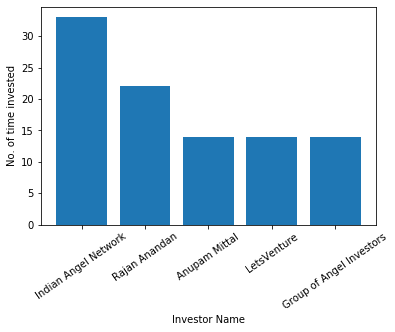

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
with open("D:\startup_funding.csv", encoding="utf8") as file:
    fileData = pd.read_csv(file)
    
    fileData.StartupName.replace('Flipkart.com','Flipkart',inplace = True)
    fileData.StartupName.replace('Ola Cabs','Ola',inplace = True)
    fileData.StartupName.replace('Olacabs','Ola',inplace = True)
    fileData.StartupName.replace('Paytm Marketplace','Paytm',inplace=True)
    fileData.StartupName.replace('Oyo Rooms','Oyo',inplace=True)
    fileData.StartupName.replace('Oyorooms','Oyo',inplace=True)
    fileData.StartupName.replace('OyoRooms','Oyo',inplace=True)
    fileData.StartupName.replace('OYO Rooms','Oyo',inplace=True)
    
    fileData.InvestmentType.fillna("Unknown", inplace = True)
    fileData.InvestmentType.replace("Crowd funding","Crowd Funding", inplace = True )
    fileData.InvestmentType.replace('PrivateEquity','Private Equity', inplace = True )
    fileData.InvestmentType.replace("SeedFunding","Seed Funding", inplace = True)
    
    fileData.InvestorsName.fillna("Unknown", inplace = True)
    
    def createDict(start, inv, invType):
        d = {}
        for i in range(len(fileData["StartupName"])): #iterate through every row
            if(invType[i] == "Seed Funding" or invType[i] == "Crowd Funding"): #Checking if type is seed or crowd funding
                if(start[i] not in d):
                    d[start[i]] = set()
                    if("," not in inv[i]):
                        d[start[i]].add(inv[i].strip())
                    else:
                        string = inv[i].strip().split(",")
                        for j in string:
                            d[start[i]].add(j.strip())
                else:
                    d[start[i]].add(inv[i])
        return d
    
    dictionary = createDict(fileData["StartupName"], fileData["InvestorsName"], fileData["InvestmentType"])

    li = set() #Unique name list
    names = fileData.InvestorsName.unique()
    for i in names:
        if("," not in i):
            li.add(i.strip()) #Adding to set li, when single name is given
        else:
            
            s = i.strip().split(",") #Removing spaces(extra) and splitting on the basis of comma
            for j in s:
                li.add(j.strip())
    
    e = {} #dictionary for values            
    count = 0
    for i in li:
        for j in dictionary:
            if(i in dictionary[j]):
                count += 1
        e[i] = count
        count = 0
    e["Undisclosed Investors"] = -1
    e[""] = -1
    e["Undisclosed investors"] = -1
    e = {k: v for k, v in sorted(e.items(), key=lambda item: item[1], reverse = True)}
    
    n = []
    l = []
    for i in e:
        n.append(i)
    for i in e.values():
        l.append(i)
    for i in range(5):
        print(n[i], "", l[i])
    x = n[0:5]
    y = l[0:5]
    plt.bar(x,y)
    plt.xlabel('Investor Name')
    plt.ylabel('No. of time invested')
    plt.xticks(rotation = 35)

Accel Partners  37
Sequoia Capital  36
Kalaari Capital  32
Blume Ventures  25
SAIF Partners  21


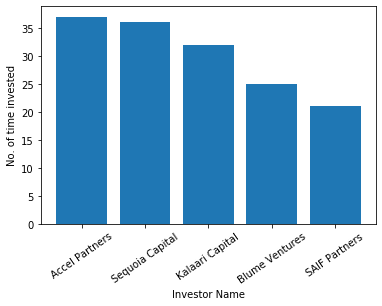

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
with open("D:\startup_funding.csv", encoding="utf8") as file:
    fileData = pd.read_csv(file)
    
    fileData.StartupName.replace('Flipkart.com','Flipkart',inplace = True)
    fileData.StartupName.replace('Ola Cabs','Ola',inplace = True)
    fileData.StartupName.replace('Olacabs','Ola',inplace = True)
    fileData.StartupName.replace('Paytm Marketplace','Paytm',inplace=True)
    fileData.StartupName.replace('Oyo Rooms','Oyo',inplace=True)
    fileData.StartupName.replace('Oyorooms','Oyo',inplace=True)
    fileData.StartupName.replace('OyoRooms','Oyo',inplace=True)
    fileData.StartupName.replace('OYO Rooms','Oyo',inplace=True)
    
    fileData.InvestmentType.fillna("Unknown", inplace = True)
    fileData.InvestmentType.replace("Crowd funding","Crowd Funding", inplace = True )
    fileData.InvestmentType.replace('PrivateEquity','Private Equity', inplace = True )
    fileData.InvestmentType.replace("SeedFunding","Seed Funding", inplace = True)
    
    fileData.InvestorsName.fillna("Unknown", inplace = True)
    
    def createDict(start, inv, invType):
        d = {}
        for i in range(len(fileData["StartupName"])): #iterate through every row
            if(invType[i] == "Private Equity"): #Checking if type is seed or crowd funding
                if(start[i] not in d): #checking if the name is already in dictionary
                    d[start[i]] = set() #creating a set so that each company do not get repeated names
                    if("," not in inv[i]): #Splitting on the basis of commas
                        d[start[i]].add(inv[i].strip()) #Adding element in set
                    else:
                        string = inv[i].strip().split(",") #When "," is present
                        for j in string: #Iterating through all the investors after splitting
                            d[start[i]].add(j.strip()) #Adding elements in set
                else:
                    d[start[i]].add(inv[i])
        return d
    
    dictionary = createDict(fileData["StartupName"], fileData["InvestorsName"], fileData["InvestmentType"])

    li = set() #Unique name list
    names = fileData.InvestorsName.unique()
    for i in names:
        if("," not in i):
            li.add(i.strip()) #Adding to set li, when single name is given
        else:
            s = i.strip().split(",") #Removing spaces(extra) and splitting on the basis of comma
            for j in s:
                li.add(j.strip())
    
    e = {} #dictionary for values            
    count = 0
    for i in li:
        for j in dictionary:
            if(i in dictionary[j]):
                count += 1
        e[i] = count
        count = 0
    e["Undisclosed Investors"] = -1 #Giving Unisclosed investors impossible values
    e[""] = -1 #Removing unwated items
    e["Undisclosed investors"] = -1 #Giving Unisclosed investors impossible values
    e = {k: v for k, v in sorted(e.items(), key=lambda item: item[1], reverse = True)} #Sorting dict on basis of values
    
    n = []
    l = []
    for i in e:
        n.append(i)
    for i in e.values():
        l.append(i)
    for i in range(5):
        print(n[i], "", l[i])
    x = n[0:5]
    y = l[0:5]
   
    plt.bar(x,y)
    plt.xlabel('Investor Name')
    plt.ylabel('No. of time invested')
    plt.xticks(rotation = 35)